In [15]:
import numpy as np
import sympy as sp
import math
from matplotlib import pyplot as plt

In [32]:
def riemann_sum_2D(f, xMin, xMax, yMin, yMax, N, method):
  delx = (xMax - xMin) / N #change in x
  dely = (yMax - yMin) / N #change in y
  sum = 0
  if method == "left":
    xstart = 0
    xstop = 2*N
    ystart = 0
    ystop = 2*N
  elif method == "right":
    xstart = 2
    xstop = 2*(N+1)
    ystart = 2
    ystop  = 2*(N+1)
  elif method == "mid":
    xstart = 1
    xstop = 2*N + 1
    ystart = 1
    ystop = 2*N + 1
  else:
    raise ValueError("Method must equal left, right, or mid")
  for j in range(ystart, ystop, 2):
    for i in range(xstart, xstop, 2):
      sum += f(xMin + (delx*i*0.5), yMin + (dely*j*0.5)) 
  return delx*dely*sum

In [35]:
f2A = lambda x,y : x * math.sin(x*y) 
print(riemann_sum_2D(f2A, 0, math.pi, 0, math.pi, 10, "mid"))
print(riemann_sum_2D(f2A, 0, math.pi, 0, math.pi, 20, "mid"))

3.335619689249048
3.2926027753992155


In [36]:
f2B = lambda x,y : y**2 * math.e**(-x-y)
print(riemann_sum_2D(f2B, 0, 1, 0, 1, 10, "mid"))
print(riemann_sum_2D(f2B, 0, 1, 0, 1, 20, "mid"))

0.10138161929961592
0.10148555992657306


In [37]:
f2C = lambda x,y : x**3 * y**2 + x*y
print(riemann_sum_2D(f2C, 0, 1, 1, 2, 10, "mid"))
print(riemann_sum_2D(f2C, 0, 1, 1, 2, 20, "mid"))

1.3302093750000006
1.3325521484375


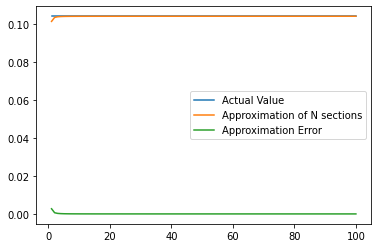

In [38]:
f3 = lambda x,y : x * math.sin(x+y)
fdf = lambda x,y : x*math.sin(x) - x*math.sin(x+y) - math.cos(x+y) + math.cos(x) + math.cos(y) - 1
AreaEval = fdf(math.pi/6, math.pi/3)
Nrange = np.linspace(1, 100, 100) #input N range
ErrorCalc = lambda x : AreaEval - x
Arange = [] #approximation range
for i in range(len(Nrange)):
  Arange += [riemann_sum_2D(f3, 0, math.pi/6, 0, math.pi/3, int(Nrange[i]), "mid")]
Erange = []
for i in range(len(Nrange)): 
  Erange += [ErrorCalc(Arange[i])] #error range
CvalRange = np.full((100,),AreaEval) #correct value range
plt.plot(Nrange, CvalRange, label="Actual Value")
plt.plot(Nrange, Arange, label="Approximation of N sections")
plt.plot(Nrange, Erange, label="Approximation Error")
plt.legend()
plt.show()

In [41]:
def riemann_sum_3D(f, xMin, xMax, yMin, yMax, zMin, zMax, N, method):
  delx = (xMin + xMax) / N #change in x
  dely = (yMin + yMax) / N #change in y
  delz = (zMin + zMax) / N #change in z
  sum = 0
  if method == "left":
    start = 0
    stop = 2*N
  elif method == "right":
    start = 2
    stop = 2*(N+1)
  elif method == "mid":
    start = 1
    stop = 2*N + 1
  else:
    raise ValueError("Method must equal left, right, or mid")
  for k in range(start, stop, 2):
    for j in range(start, stop, 2):
      for i in range(start, stop, 2):
        sum += f(xMin + (0.5*delx*i), yMin + (0.5*dely*j), zMin + (0.5*delz*k))
  return delx*dely*delz*sum

In [44]:
f5 = lambda x,y,z : x*y + z**2
print(riemann_sum_3D(f5, 0, 2, 0, 1, 0, 3, 10, "mid"))
print(riemann_sum_3D(f5, 0, 2, 0, 1, 0, 3, 20, "mid"))

20.95500000000001
20.988750000000046
